In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
from config import *

ModuleNotFoundError: No module named 'config'

```{index} か 回帰分析
:name: 回帰分析
```

# 演習：回帰分析

## アルゴリズム

```{index} か 回帰
```

```{index} と 特徴量
```

```{index} せ 説明変数
```

```{index} も 目的変数
```

```{index} お 応答変数
```

```{index} じ 重回帰分析
```

```{index} た 単回帰分析
```


**回帰**（**regression**）とは、ある変数（結果）が別の変数（原因）に影響されて変化する関係を探り、数式で表現する方法のことです。結果を表す変数のことを**目的変数**（**objective variable**）または**応答変数**（**response variable**）といい、原因を表す変数のことを**説明変数**（**explanatory variable**）または**特徴量**（**feature**）といいます。一般的に統計解析を行うときに説明変数を呼ぶ場合が多く、機械学習の分野では特徴量と呼ぶ場合が多いです。特徴量が 1 つだけのときの回帰を**単回帰**（**simple regression**）といいます。また、説明変数が複数あるとき、これを**重回帰**（**multiple regression**）といいます。

単回帰では、例えば BMI を利用して糖尿病リスクを予測する場合、目的変数は糖尿病リスクであり、特徴量が BMI となります。一般的に、目的変数を $Y$、特徴量を $X$ と表し、両者に線形的な関係が見られる場合、その関係を次のように表現できます。
​

$$
Y = \beta_{1}X + \beta_{0} + \epsilon
$$


ここで $\epsilon$ は、モデルと観測値の誤差を表します。統計解析では、$\epsilon$ が正規分布に従うことを前提としますが、機械学習ではそのような分布の仮定は必要ありません。これは、機械学習が数学的または統計的理論に基づく厳密性よりも、実際のデータに基づく予測性能を優先するアプローチを取るためです。

また、誤差 $\epsilon$ を明記せず、次のように簡略化した形で表現することもあります。この記法では、観測値 $Y$ がモデル $\beta_{1}X + \beta_{0}$ に基づいて生成されることを示しています。


$$
Y \sim  \beta_{1}X + \beta_{0}
$$


```{index} 回帰係数
```

```{index} パラメーター
```

上記の式に基づき、$\beta_{1}$ と $\beta_{0}$ の値がわかれば、BMI を使って糖尿病リスクに与える影響を評価したり、予測したりすることができます。これらの $\beta_{1}$ および $\beta_{0}$ は**パラメーター**（**parameter**）と呼ばれ、特に回帰分析では**回帰係数**（**regression coefficient**）とも呼ばれます。また、パラメータが推定されたことにより得られる式（例えば $Y = 1.5X + 60$）のことを**モデル**（**model**）と呼びます。

実際の問題では、多くの場合、複数の要因が結果に影響を与えます。特に生命科学のデータには多くの特徴量が含まれるため、実務上はほとんどの回帰分析が重回帰に該当します。複数の特徴量を $X_{1}, X_{2}, \dots, X_{n}$ とおくと、重回帰は次のような式で表現されます。

$$
Y \sim  \beta_{n}X_{n} + \beta_{n-1}X_{n-1} + \beta_{n-2}X_{n-2} + \cdots + \beta_{1}X_{1} + \beta_{0}
$$

```{index} 正規化
```

```{index} 標準化
```

特徴量の数が多くなると、各特徴量の単位が異なります。観測されたデータをそのまま利用してパラメータを推定すると、値の大きい特徴量に重みがかかり最適なパラメータを推定できないことがあります。そのため、複数の特徴量があるとき、すべての特徴量を同じ範囲あるいは分布に揃える必要があります。よく利用されるのが、すべての特徴量を平均 0 および分散 1 の正規分布に変換する**標準化**（**standardization**）とあるいはすべての特徴量を最小値 0 かつ最大値 1 の範囲に収める**正規化**（**normalization**）があります。なお、回帰分析は正規分布を仮定しているため、標準化を行うのが一般的ですが、データの分布の特徴により正規化する場合もあります。


## 演習準備

本節では、scikit-learn ライブラリが提供している diabetes データセットを利用して、年齢、性別、BMI、血圧やさまざまな血液指標を利用して、1 年後の糖尿病の進行度合いを予測することを例に、回帰分析を説明していきます。

まず、本節で利用する Python のライブラリをインポートします。numpy、pandas、matplotlib ライブラリはデータの読み込みや整形、可視化などに利用します。sklearn はサンプルデータセットの取得およびデータセットを訓練サブセットと検証サブセットに分けるために利用します。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.pipeline
import sklearn.metrics

sklearn.datasets から diabetes データセットを読み込み、pandas で整形します。整形後のデータについて、1 列目は予測したい値である「1 年後の糖尿病の進行度合い」であり、2 列目以降は年齢、性別、BMI、血圧および 6 種類の血液指標になります。

In [3]:
data = sklearn.datasets.load_diabetes(scaled=False)
Y = data.target
X = data.data
data = pd.concat([
    pd.Series(Y, name='Y'),
    pd.DataFrame(X, columns=data.feature_names),
], axis='columns')
data.head()

,Y,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,75.0,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,141.0,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,206.0,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,135.0,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


次にこれらのデータを 8:2 の割合で分割し、80% のデータを回帰モデルを構築するのに利用し、残りの 20% のデータをモデルの検証するために利用します。

In [4]:
train_data, valid_data = sklearn.model_selection.train_test_split(data, test_size=0.2, random_state=0)

## 演習（単回帰）

BMI を利用して 1 年後の糖尿病の進行度を予測する単回帰モデルを作ってみよう。分析にあたり、BMI（bmi）と 1 年後の糖尿病の進行度（Y）の関係を可視化します。

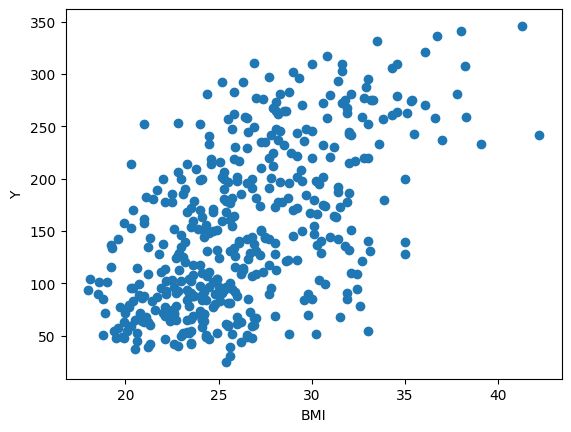

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data['bmi'], data['Y'])
ax.set_xlabel('BMI')
ax.set_ylabel('Y')
fig.show()

可視化の結果、BMI が高いほど、1 年後の糖尿病の症状が重くなる傾向が見られました。両者の間に直線な関係を仮定して、回帰を行います。つまり、誤差はあるものの、BMI（$X$）と 1 年後の糖尿病の症状（$Y$）の間に


$$
Y = \beta_{1}X + \beta_{0}
$$


の関係が成り立ち、モデルのパラメーターである $\beta_{0}$ および $\beta_{1}$ を推定していきます。

In [6]:
model = sklearn.linear_model.LinearRegression()
model.fit(train_data[['bmi']], train_data['Y'])

LinearRegression()

訓練サブセットを利用して推定したモデルのパラメータを見てみましょう。

In [7]:
print(f'beta_0 = {model.intercept_}; beta_1 = {model.coef_[0]}')

beta_0 = -126.77820035769682; beta_1 = 10.580400814636999


次に、訓練データとモデルを可視化して、モデルがデータに適合しているか確認します。

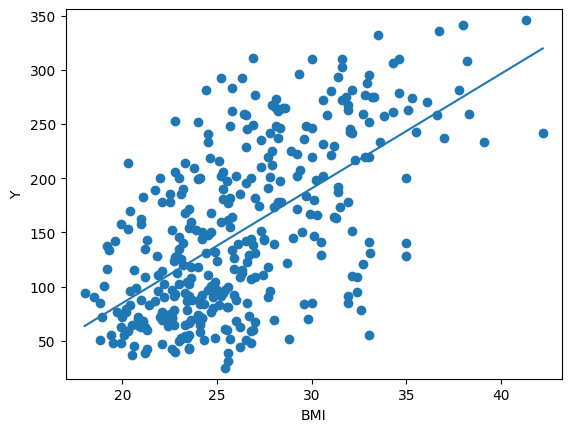

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(train_data['bmi'], train_data['Y'])


x1 = min(train_data['bmi'])
x2 = max(train_data['bmi'])
y1 = model.coef_[0] * x1 + model.intercept_
y2 = model.coef_[0] * x2 + model.intercept_
ax.plot([x1, x2], [y1, y2])
ax.set_xlim(min(train_data['bmi']) - 1, max(train_data['bmi']) + 1)
ax.set_ylim(min(train_data['Y']) - 10, max(train_data['Y']) + 10)
ax.set_xlabel('BMI')
ax.set_ylabel('Y')
plt.show()

モデル（回帰直線）が訓練データのほぼ真ん中を通り、妥当なものと判断できます。次に、目視による確認ではなく、数値で評価していきます。評価サブセットをこのモデルに代入し、その予測精度を計算します。なお、回帰分析のモデルを評価する指標は RMSE、MSE、MAE、決定係数（R<sup>2</sup>）、自由度調整済み決定係数などがありますが、RMSE が一般的に使われています。ここでも、RMSE を利用します。

In [9]:
y_pred = model.predict(valid_data[['bmi']])
rmse = sklearn.metrics.root_mean_squared_error(valid_data['Y'], y_pred)
print(rmse)

64.42577271038341


検証サブセットで計算した RMSE は {glue:}`lm_rmse` となりました。このモデルで予測した 1 年後の糖尿病の進行度は、多くの場合、予測値 &plusmn;{glue:}`lm_rmse` の範囲に収まると判断して構いません。このモデルは妥当かどうかは、比較対象がないため、この時点では評価できません。また、この糖尿病の進行指数が 65 上下しても治療法などに劇的な変化なければ、このモデルは受けられるでしょう。しかし、この糖尿病の進行指数が 10 でも変化したら、糖尿病の進行が非常に深刻になるという状況であれば、このモデルは医療現場で用いるべくではないでしょう。

BMI だけで、検証性能である RMSE は {glue:}`lm_rmse` となりました。では、説明変数を増やしていていったら、予測性能はどのように変換するのかをみていきましょう。

In [10]:
glue('lm_rmse', round(float(rmse), 3), display=False)

NameError: name 'glue' is not defined

## 演習（重回帰）

diabetes データセットには、BMI だけでなく、年齢、などの要因も含まれています。そこで、BMI（$X_{1}$）と年齢（$X_{2}$）という二つの特徴量を利用して、モデルを構築してみよう。例えていうならば、BMI である程度糖尿病の進行度を予測できましたが、そこに年齢の要素を足します。BMI で予測した値に、年齢が高ければもう少しプラスアルファしてあげるなどのような操作を行います。


$$
Y =  \beta_{2}X_{2} + \beta_{1}X_{1} + \beta_{0}
$$

なお、特徴量が複数存在するとき、単位の異なる特徴量も含まれます。BMI と年齢はあきらかに異なる単位であり、BMI は高くても 40、50 くらいであり、それに対して年齢は 70、80 前後のものもあります。これらを同等に扱うと、値の大きい年齢という特徴量に重みがかかり、最適なモデルを推定できなくおそれがあります。そこで、回帰をりようしてモデルを推定する前に、これらのデータのスケールを揃える必要があります。ここでは、すべての特徴量を平均 0、分散 1 となるようにスケーリングしてから回帰します。

In [11]:
model = sklearn.pipeline.Pipeline([
    ('scaler', sklearn.preprocessing.StandardScaler()),
    ('regressor', sklearn.linear_model.LinearRegression()),
])
model.fit(train_data[['age', 'bmi']], train_data['Y'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [12]:
print(model.named_steps['regressor'].coef_)

[ 5.03658789 46.95199415]


モデルの係数を確認すると、BMI にかかる係数が年齢に比べて非常に大きいです。つまり、このモデルは主に BMI の値で糖尿病の進行度を予測し、年齢要素を考慮してプラスアルファしていると捉えることができます。次に、このモデルを評価サブセットで RMSE を計算します。

In [13]:
y_pred = model.predict(valid_data[['age', 'bmi']])
rmse = sklearn.metrics.root_mean_squared_error(valid_data['Y'], y_pred)
print(rmse)

63.73934962529515


In [14]:
glue('mlm_rmse_2', round(float(rmse), 3), display=False)

NameError: name 'glue' is not defined

特徴量を増やせば、予測誤差が減ることを確認できました。BMI だけを利用した時の RMSE（{glue:}`lm_rmse`）に比べ、わずかな改善が見られました。

次に、BMI と年齢だけでなく、測定されたデータをすべて入れて、モデルを構築していきます。

In [15]:
model = sklearn.pipeline.Pipeline([
    ('scaler', sklearn.preprocessing.StandardScaler()),
    ('regressor', sklearn.linear_model.LinearRegression()),
])
model.fit(train_data.drop(columns=['Y']), train_data['Y'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

パラメータを推測する際に各特徴量を同じスケールに揃えたので、それぞれの特徴量にかかる係数（パラメーター）の値を見ることで、それぞれの特徴量がどのように糖尿病の進行に影響を与えているのかを解釈できます。たとえば、BMI や s5（possibly log of serum triglycerides level）の値が大きければ糖尿病の進行が速く、s1 （total serum cholesterol）の値が大きければ糖尿病の進行が遅いと解釈できそうです。

<ipython-input-16-82d31f2fe258>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


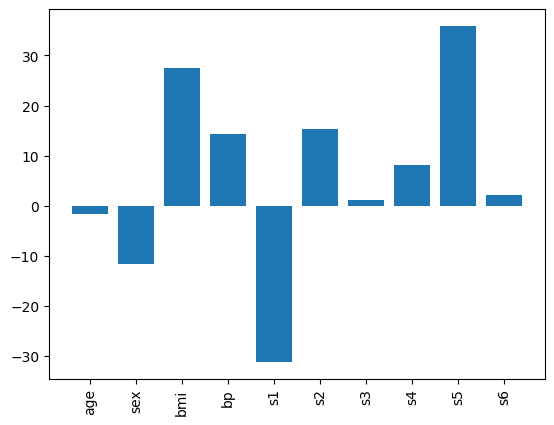

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(data.columns[1:], model.named_steps['regressor'].coef_)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.show()

検証サブセットを利用して RMSE を計算します。

In [17]:
y_pred = model.predict(valid_data.drop(columns=['Y']))
rmse = sklearn.metrics.root_mean_squared_error(valid_data['Y'], y_pred)
print(rmse)

58.51717127731562


In [ ]:
glue('mlm_rmse_full', round(float(rmse), 3), display=False)

特徴量を増やすことで予測誤差が減少することを確認できました。BMI のみを使用した場合の RMSE は {glue:}`lm_rmse` であり、10 個の特徴量をすべて使用した場合の RMSE は {glue:}`mlm_rmse_full` でした。しかし、特徴量を増やしたにもかかわらず、予測性能の劇的な改善は見られませんでした。このように、モデルの予測性能を改善する際には、目的なく特徴量を増やすのではなく、目的変数と強い関係を持つ特徴量を選択することが重要です。